In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# CLEANED DATA 
df = pd.read_csv( "data/cleaned/cleaned_data.csv")

# TEXT LENGTH SATISTIC

In [53]:
stats = df["word_count"].describe()
print( stats )

count    522.000000
mean      83.781609
std       91.564385
min        3.000000
25%       26.000000
50%       58.000000
75%      107.000000
max      670.000000
Name: word_count, dtype: float64


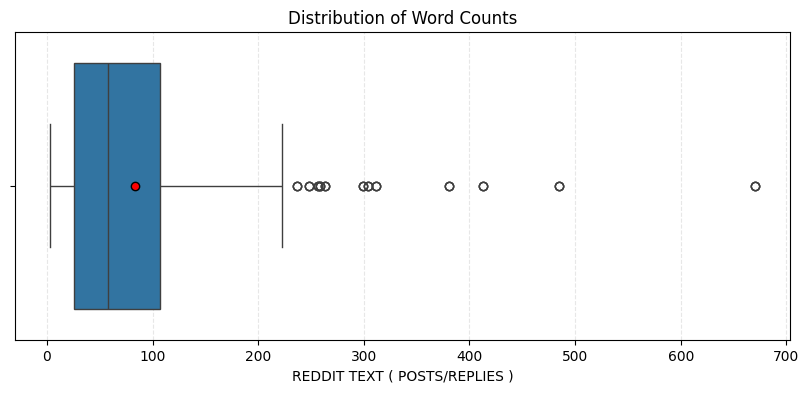

In [54]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    x=df['word_count'], # DATA FROM COLUMN BEING USE FOR DISTRUBUTION
    showmeans=True,     # MEAN INDICATOR
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

plt.xlabel("REDDIT TEXT ( POSTS/REPLIES )")
plt.title("Distribution of Word Counts")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()

## Frequency-based Analysis

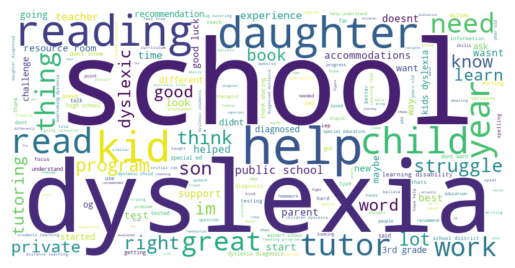

In [61]:
import re # REGRESS EXPRESSION

from collections import Counter
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS # STOP WORD LIST

# Simple Preprocessing
def preprocess(text):
    text = str(text).lower()            # LOWERCASE TEXT
    text = re.sub(r'[^\w\s]', '', text) # REMOVE PUNCTUATION
    return text

# STOP WORDS
stopwords = set(STOPWORDS)

all_words = ' '.join(df['text'].apply(preprocess)).split()
filtered_words = [w for w in all_words if w not in stopwords]

# Top-N Words
top_n = 30
most_common = Counter(filtered_words).most_common(top_n)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ENGAGEMENT STATISTIC

In [72]:


posts_only = df[df["kind"] == "t3"].copy()
total_posts= len(posts_only)

# MIN - MAX - MEAN
eng_min  = posts_only["num_comments"].min()
eng_max  = posts_only["num_comments"].max()
eng_mean = posts_only["num_comments"].mean()

# PCT ZERO REPLY
none_reply_count = ( posts_only["num_comments"] == 0 ).sum()
pct_none_reply   = ( none_reply_count / total_posts ) * 100 

k = 5  # You can change this number to 10, 20, etc.
top_k_posts = posts_only.nlargest(k, 'num_comments')[['title', 'num_comments', 'author']]

print(f"--- Engagement Summary (Total Posts: {total_posts}) ---")
print(f"Replies per Post -> Min: {eng_min} | Max: {eng_max} | Average: {eng_mean:.2f}")
print(f"Posts with Zero Replies: {none_reply_count:.2f}%")
print(f"\nTop {k} Highly Engaged Posts:")
print(top_k_posts)

--- Engagement Summary (Total Posts: 54) ---
Replies per Post -> Min: 0.0 | Max: 23.0 | Average: 9.39
Posts with Zero Replies: 9.00%

Top 5 Highly Engaged Posts:
                                                 title  num_comments  \
3                                   Dyslexia diagnosis          23.0   
5    What is the benefit of a dyslexia diagnosis, a...          23.0   
12                                    Dyslexia Schools          23.0   
177                                 Dyslexia diagnosis          23.0   
179  What is the benefit of a dyslexia diagnosis, a...          23.0   

                   author  
3                seaspray  
5                seaspray  
12   Background_Strike_14  
177              seaspray  
179              seaspray  
